In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

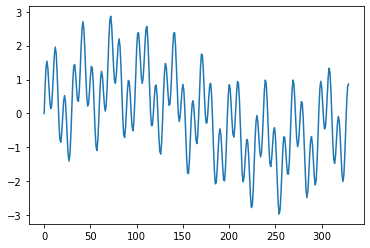

In [59]:
L0 = 10
L1 = 1
L2 = 0.3
sf = int(10 / L2)
t_span = L0
x = np.linspace(0, t_span, sf * t_span)

def sin(x, L):
    return np.sin(2 * np.pi * (1 / L) * x)

signal = sin(x, L0) + sin(x, L1) + sin(x, L2)

plt.plot(signal)
# plt.plot(sin(x, L0), 'r--')
# plt.plot(sin(x, L1), 'g--')
# plt.plot(sin(x, L2), 'm--')
plt.show()